In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.read_edgelist("out.arenas-jazz")

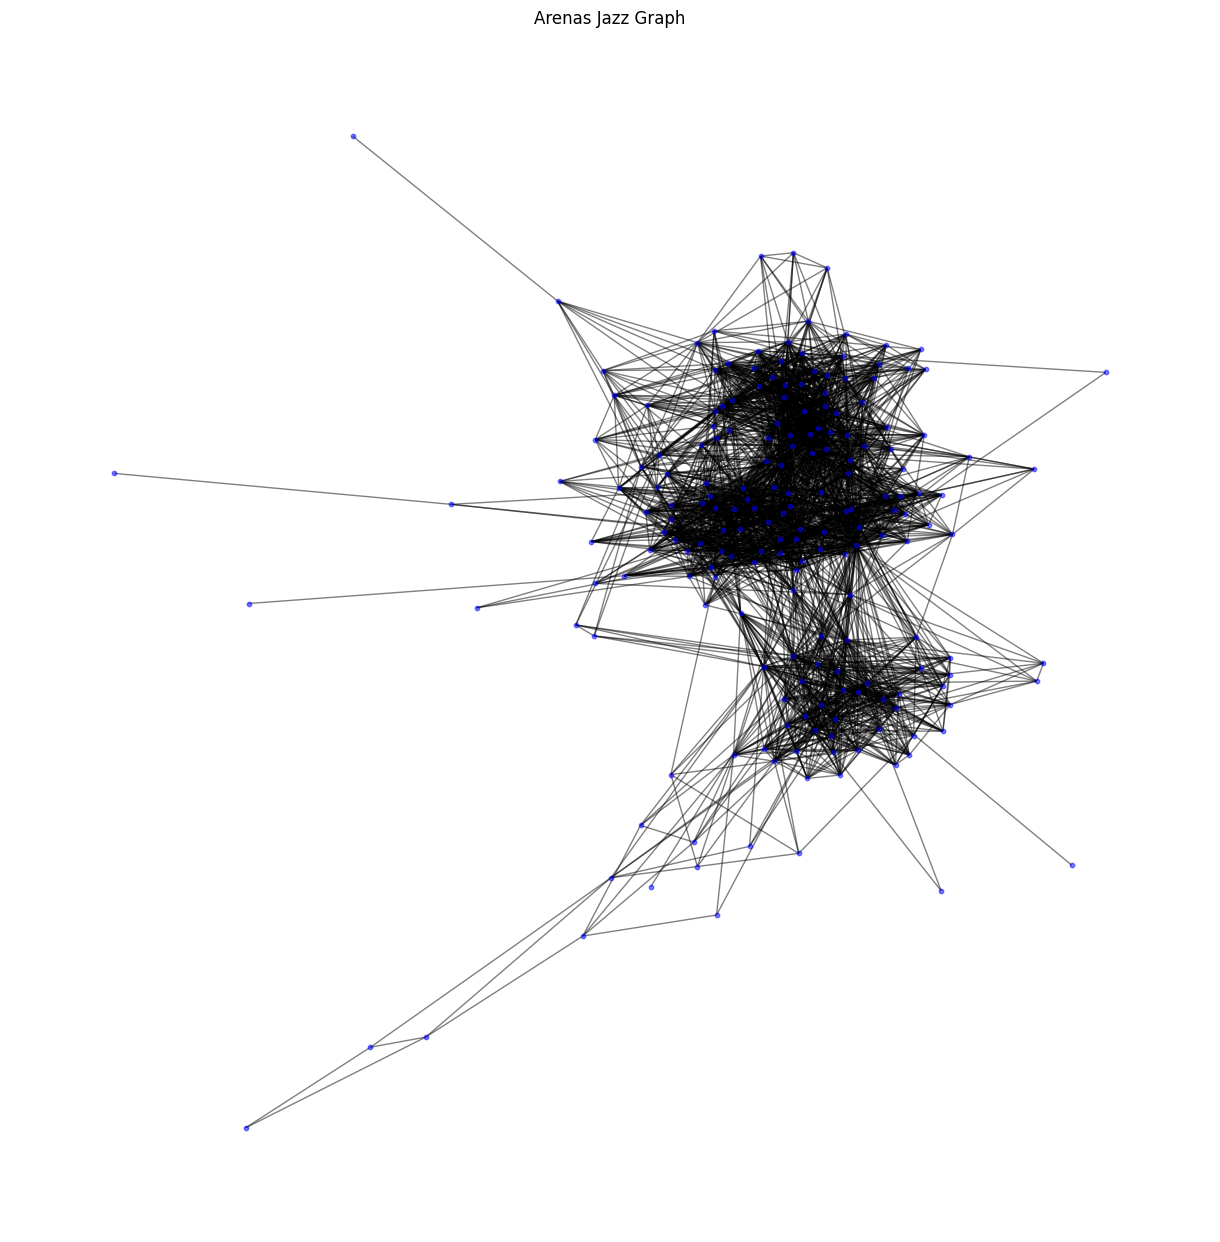

In [4]:
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, node_size=10, node_color="blue", alpha=0.5, with_labels=False)
plt.title("Arenas Jazz Graph")
plt.axis("off")
plt.show()

In [5]:
print(nx.clustering(G))
print(f"Average Local Clustering Coefficient: {nx.average_clustering(G)} ")
print(f"Global Clustering Coefficient: {nx.transitivity(G)} ")

{'1': 0.6561264822134387, '10': 0.4831591173054588, '11': 0.5128205128205128, '12': 0.6405797101449275, '13': 0.46497175141242936, '14': 0.5952380952380952, '15': 0.592687074829932, '16': 0.4624505928853755, '17': 0.5157894736842106, '18': 0.4858757062146893, '19': 0.512987012987013, '2': 0.7428571428571429, '20': 0.40396396396396395, '21': 0.6356589147286822, '22': 0.4666666666666667, '23': 0.36208811551277303, '24': 0.4626262626262626, '3': 0.4802955665024631, '4': 0.6356589147286822, '5': 0.5151515151515151, '6': 0.6482213438735178, '7': 0.31162280701754386, '8': 0.5157894736842106, '9': 0.46153846153846156, '120': 0.6838235294117647, '121': 0.6323366555924695, '122': 0.41585365853658535, '123': 0.45209176788124156, '124': 0.524731182795699, '125': 0.39064856711915535, '67': 0.23717171717171717, '130': 0.47368421052631576, '145': 0.9285714285714286, '146': 0.8055555555555556, '147': 0.9285714285714286, '148': 0.4746376811594203, '149': 0.5718085106382979, '150': 0.6699857752489331, 

In [6]:
count, nodes = sum(1 for _, val in nx.clustering(G).items() if val == 1), [ k for k, v in nx.clustering(G).items() if v == 1]

nodes

['158', '188', '25', '144', '29', '196', '185', '186', '99', '77']

In [7]:
average_degree = sum(deg for k,deg in G.degree() if k in nodes) / len(nodes)
average_degree

7.8

In [8]:
nodes = [k for k, deg in G.degree() if deg == 23]
average_clustering_coeff = sum(nx.clustering(G)[k] for k in nodes) / len(nodes)
print("Average clustering coefficient of nodes with degree 23:", average_clustering_coeff)

Average clustering coefficient of nodes with degree 23: 0.6534914361001317


In [1]:
from collections import defaultdict

In [ ]:
nodes_for_dict = defaultdict(set)
degrees = nx.degree(G)
for node, degree in degrees:
    nodes_for_dict[degree].add(node)
print(nodes_for_dict)


defaultdict(<class 'set'>, {23: {'106', '1', '104', '108', '44', '82', '6', '16', '41'}, 42: {'84', '10', '54'}, 40: {'66', '33', '60', '11', '165'}, 46: {'12', '137', '27', '119', '35'}, 60: {'13', '18'}, 49: {'14', '15'}, 20: {'126', '140', '8', '71', '17', '131', '59', '113'}, 56: {'19', '74'}, 21: {'2', '138'}, 75: {'20'}, 43: {'21', '4', '121'}, 10: {'22', '192'}, 74: {'23'}, 45: {'24', '75', '32'}, 29: {'103', '88', '159', '3', '38'}, 12: {'72', '5', '187'}, 96: {'7'}, 26: {'83', '96', '9'}, 17: {'189', '57', '120', '69', '65'}, 41: {'97', '31', '122', '128'}, 39: {'28', '155', '42', '164', '114', '123'}, 31: {'170', '56', '124', '37', '47', '68', '102', '110', '52'}, 52: {'62', '125'}, 100: {'67'}, 19: {'158', '40', '130', '53', '129', '39', '136'}, 8: {'145', '188', '147'}, 9: {'92', '146', '175'}, 24: {'48', '148', '94', '45', '46'}, 48: {'149', '112'}, 38: {'150'}, 11: {'157'}, 25: {'36', '160', '26', '73', '85'}, 55: {'101', '117'}, 51: {'133'}, 30: {'91', '152'}, 34: {'167'

In [ ]:
def calculate_average_clustering_coefficient(G, set_of_nodes):
    clustering_coeffs = nx.clustering(G)
    tot = 0
    for node in set_of_nodes:
        tot += clustering_coeffs[node]
    return tot / len(set_of_nodes)
def calculate_standard_deviation(G, set_of_nodes):
    mean = calculate_average_clustering_coefficient(G, set_of_nodes)
    clustering_coeffs = nx.clustering(G)
    variance = 0
    for node in set_of_nodes:
        variance += (clustering_coeffs[node] - mean) ** 2
    return (variance / len(set_of_nodes)) ** 0.5

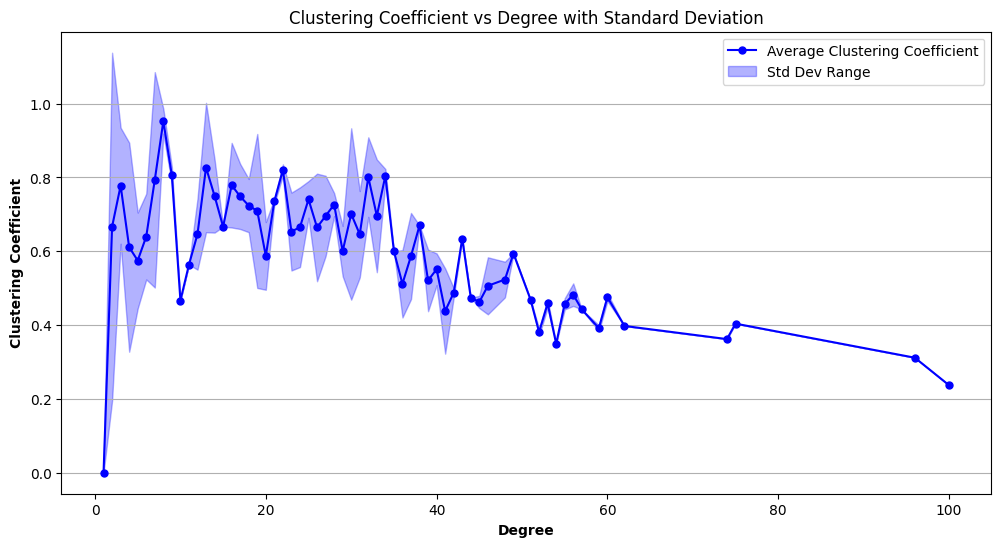

In [ ]:
clustering_coeff_for_degrees = defaultdict(float)
standard_deviation_for_degrees = defaultdict(float)
for degree, nodes in nodes_for_dict.items():
    clustering_coeff = calculate_average_clustering_coefficient(G, nodes)
    standard_deviation = calculate_standard_deviation(G, nodes)
    clustering_coeff_for_degrees[degree] = clustering_coeff
    standard_deviation_for_degrees[degree] = standard_deviation
ordered_dict = dict(sorted(clustering_coeff_for_degrees.items()))
# plotting the average clustering coefficient for each degree
def plot_clustering_coefficients(clustering_coeff_for_degrees, standard_deviation_for_degrees):
    plt.figure(figsize=(12, 6))
    degrees = list(clustering_coeff_for_degrees.keys())
    avg_clustering = list(clustering_coeff_for_degrees.values())
    std_dev = [standard_deviation_for_degrees[deg] for deg in degrees]

    # Plot average clustering coefficient
    plt.plot(degrees, avg_clustering, ms=5, color='blue', marker='o', label='Average Clustering Coefficient')

    upper_bound = [avg + std for avg, std in zip(avg_clustering, std_dev)]
    lower_bound = [avg - std for avg, std in zip(avg_clustering, std_dev)]
    plt.fill_between(degrees, lower_bound, upper_bound, color='blue', alpha=0.3, label='Std Dev Range')

    plt.xlabel("Degree", weight='bold')
    plt.ylabel("Clustering Coefficient", weight='bold')
    plt.title("Clustering Coefficient vs Degree with Standard Deviation")
    plt.grid(axis='y')
    plt.legend()
    plt.show()

plot_clustering_coefficients(ordered_dict, standard_deviation_for_degrees)

    